From https://data-ogauthority.opendata.arcgis.com/datasets/daily-buchan-production-data


In [4]:
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm.auto import tqdm
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path

In [5]:
data_in = Path("../../data/raw/daily_buchan_prod_data/")
data_out = Path("../../data/processed/daily_buchan_prod_data")

# Load, process

In [91]:
df = pd.read_csv(data_in / "Daily_Buchan_Production_Data.csv")
df.index = pd.to_datetime(df["DATE_"])
df = df[df["PRODUCED_GAS_GAS_MMCF"] > 0]
df = df.drop(columns=["DATE_", "OBJECTID"])

In [92]:
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y), crs="EPSG:4230")
data_out.mkdir(parents=True, exist_ok=True)
gdf2.to_file(data_out / "Daily_Buchan_Production_Data.gpkg", driver="GPKG")
gdf2

,X,Y,WELLID,FIELDWELL,DAILY_WELL_DRY_OIL_BBL,PRODUCED_GAS_GAS_MMCF,PRODUCED_WATER_BBL,geometry
DATE_,,,,,,,,
1982-09-01 00:00:00+00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,103004.15,30.15,0.00,POINT (-0.00997 57.90395)
1982-10-01 00:00:00+00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,98830.14,28.89,0.00,POINT (-0.00997 57.90395)
1983-05-01 00:00:00+00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,171713.24,50.05,126.99,POINT (-0.00997 57.90395)
1983-06-01 00:00:00+00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,220180.31,63.98,13648.94,POINT (-0.00997 57.90395)
1983-07-01 00:00:00+00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,159780.23,46.99,83178.52,POINT (-0.00997 57.90395)
...,...,...,...,...,...,...,...,...
2007-03-09 00:00:00+00:00,0.032207,57.903599,21/01a- 9V,Buchan:B03w,1280.48,0.23,1357.40,POINT (0.03221 57.90360)
2007-03-10 00:00:00+00:00,0.032207,57.903599,21/01a- 9V,Buchan:B03w,1244.36,0.22,1394.24,POINT (0.03221 57.90360)
2007-03-11 00:00:00+00:00,0.032207,57.903599,21/01a- 9V,Buchan:B03w,1289.53,0.23,1253.52,POINT (0.03221 57.90360)


## Load

In [104]:
gdf = gpd.read_file(data_out / "Daily_Buchan_Production_Data.gpkg")
gdf.index = pd.to_datetime(gdf["DATE_"])
gdf

,DATE_,X,Y,WELLID,FIELDWELL,DAILY_WELL_DRY_OIL_BBL,PRODUCED_GAS_GAS_MMCF,PRODUCED_WATER_BBL,geometry
DATE_,,,,,,,,,
1982-09-01,1982-09-01T00:00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,103004.15,30.15,0.00,POINT (-0.00997 57.90395)
1982-10-01,1982-10-01T00:00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,98830.14,28.89,0.00,POINT (-0.00997 57.90395)
1983-05-01,1983-05-01T00:00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,171713.24,50.05,126.99,POINT (-0.00997 57.90395)
1983-06-01,1983-06-01T00:00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,220180.31,63.98,13648.94,POINT (-0.00997 57.90395)
1983-07-01,1983-07-01T00:00:00,-0.009973,57.903951,20/05a- 1,Buchan:B04,159780.23,46.99,83178.52,POINT (-0.00997 57.90395)
...,...,...,...,...,...,...,...,...,...
2007-03-09,2007-03-09T00:00:00,0.032207,57.903599,21/01a- 9V,Buchan:B03w,1280.48,0.23,1357.40,POINT (0.03221 57.90360)
2007-03-10,2007-03-10T00:00:00,0.032207,57.903599,21/01a- 9V,Buchan:B03w,1244.36,0.22,1394.24,POINT (0.03221 57.90360)
2007-03-11,2007-03-11T00:00:00,0.032207,57.903599,21/01a- 9V,Buchan:B03w,1289.53,0.23,1253.52,POINT (0.03221 57.90360)


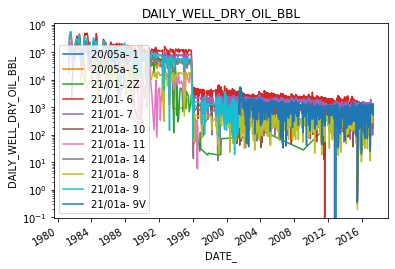

In [105]:
for name, df in gdf.groupby("WELLID"):
    df["DAILY_WELL_DRY_OIL_BBL"].plot(label=name)
plt.title("DAILY_WELL_DRY_OIL_BBL")
plt.legend()
plt.ylabel("DAILY_WELL_DRY_OIL_BBL")
plt.yscale("log")

,DAILY_WELL_DRY_OIL_BBL,PRODUCED_GAS_GAS_MMCF,PRODUCED_WATER_BBL
DATE_,,,
1981-05-01,281761.00,86.74,0.00
1981-05-02,0.00,0.00,0.00
1981-05-03,0.00,0.00,0.00
1981-05-04,0.00,0.00,0.00
1981-05-05,0.00,0.00,0.00
...,...,...,...
2017-05-09,2260.34,0.53,3751.31
2017-05-10,2131.04,0.46,3338.52
2017-05-11,2318.01,0.48,3585.47


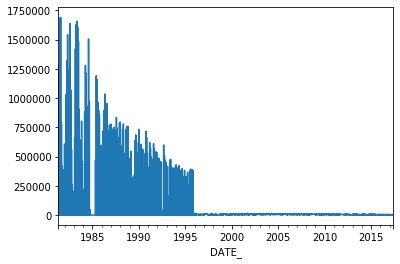

In [106]:
# aggregate over wells and fields
df_field = (
    gdf.dropna()
    .resample("1D")
    .sum()[["DAILY_WELL_DRY_OIL_BBL", "PRODUCED_GAS_GAS_MMCF", "PRODUCED_WATER_BBL"]]
)  # .dropna()

df_field["DAILY_WELL_DRY_OIL_BBL"].plot()
df_field